Our task is to find the roots of a given function in the complex plane via the Newton-Raphson method.
The iteration scheme is the same as for functions in real space:
\begin{equation}
    z_{n+1}=z_n-\frac{f(z)}{f'(z)},\quad\textnormal{where}\quad z\in\mathbb{C}.
\end{equation}

Firstly, we consider the following complex-valued function:
\begin{equation}
    f(z)=z^3-1.
\end{equation}

Thus, we are asked to solve the equation: $z^3-1=0$.

The iteration procedure in our case reads:
\begin{equation}
    z_{n+1}=z_n-\frac{z^3_n-1}{3z^2_n}.
\end{equation}

In [2]:
import cmath   # to deal with complex numbers
import numpy as np
from matplotlib import pyplot as plt 

In the next section we define de following functions:
- $\textbf{f}$ evaluates the complex function.
- $\textbf{Newton\_Raphson}$ evaluates the recurrence relation.
- $\textbf{solve\_cnewton}$ performs the Newton_Raphson method for a given initial point and returns the coordinates of the starting point, the root (or the last guess if it does not converge), the function evaluated at the root, the number of steps $n$, and $\log_{10}(n)$.

In [4]:
def f(z):
    return z**3 - 1


def Newton_Raphson(z):
    z_new = z - (z**3 - 1)/(3*z**2)
    return z_new


def solve_cnewton(duplet):
    counter = 0
    
    x_duplet, y_duplet = duplet
    z = complex(x_duplet, y_duplet)   # make the duplet a point of the complex plane
    #print("z=",z)
    
    for i in range(M):
        z_new = Newton_Raphson(z)
        counter = counter + 1
        
        f_new = f(z_new)
    
        if f_new == 0 or abs(z_new - z) < tolerance:   # we are done
            return x_duplet, y_duplet, z_new, f_new, counter, np.log10(counter)
        elif i == M - 1:
            return x_duplet, y_duplet, z_new, f_new, counter, np.log10(counter)

        z = z_new

-1.9420289855072463 1.8840579710144927 (-0.5+0.8660254037844386j) (-2.220446049250313e-16+1.1102230246251565e-16j) 8 0.9030899869919435


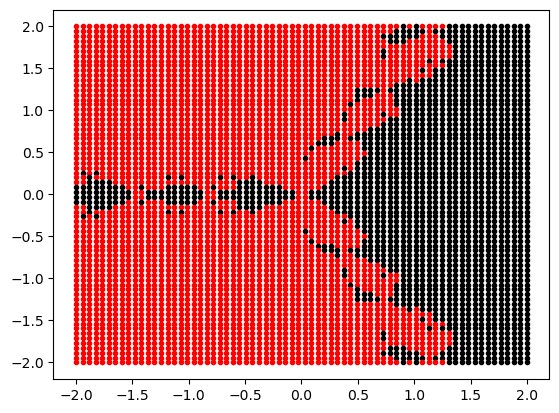

In [20]:
tolerance = 1e-9
M = 200   # maximal number of steps
N = 70   # dimension of the square grid (NxN square matrix)

grid_point1 = (-2, 2)   # upper left
grid_point2 = (2, -2)   # lower right
x1, y1 = grid_point1
x2, y2 = grid_point2

x_values = np.linspace(x1, x2, N)   # create the two "axes" of the grid
y_values = np.linspace(y1, y2, N)

x, y = np.meshgrid(x_values, y_values)   # create coordinates of the grid points
#print("x=",x)
#print("y=",y)
grid = np.dstack((x, y))   # construct the grid, each point of it corresponds to a duplet (x, y)
#print(grid)
#print(grid[N-1][N-1])

x_duplet, y_duplet, root, f_root, counter, log_counter = solve_cnewton(grid[2][1])   # test
print(x_duplet, y_duplet, root, f_root, counter, log_counter)

plt.figure()
for i in range(N):
    for j in range(N):
        x_duplet, y_duplet, root, f_root, counter, log_counter = solve_cnewton(grid[i][j])
        if abs(root.real - 1) < tolerance:
            plt.scatter(x_duplet, y_duplet, c="k", marker=".")
        else:
            plt.scatter(x_duplet, y_duplet, c="r", marker=".")
        #print(f"x0={x_duplet}, y0={y_duplet}, root={root}, f(root)={f_root}, counter={counter}, log={log_counter}")
        #print("")